In [11]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
# parquet 파일 데이터를 읽어온다.

In [13]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [14]:
# parquet 파일 데이터를 읽어온다.
# df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
# df1

#### 분석 전 주의사항

- 하나의 파일에서 작업을 다 하려고 하지 마세요
- 데이터를 읽어온 다음 데이터를 가공했다면 가공한 데이터를 파일로 저장하고 새로운 ipynb 파일을 만들어서 저장한 데이터를 읽어와서 작업하는 형태로 해주세요

### 데이터 불러오기

In [20]:
#201807~201812 마케팅 정보 train 데이터 병합
df1 = pd.read_parquet('open/train/7.마케팅정보/201807_train_마케팅정보.parquet')
df2 = pd.read_parquet('open/train/7.마케팅정보/201808_train_마케팅정보.parquet')
df3 = pd.read_parquet('open/train/7.마케팅정보/201809_train_마케팅정보.parquet')
df4 = pd.read_parquet('open/train/7.마케팅정보/201810_train_마케팅정보.parquet')
df5 = pd.read_parquet('open/train/7.마케팅정보/201811_train_마케팅정보.parquet')
df6 = pd.read_parquet('open/train/7.마케팅정보/201812_train_마케팅정보.parquet')

In [21]:
marketing_merged = pd.concat([df1,df2,df3,df4,df5,df6])
marketing_merged.to_parquet('open/train/7.마케팅정보//marketing_merged.parquet')

In [22]:
df = marketing_merged

### 세그먼트 컬럼 추가하기

In [30]:
#회원정보 데이터 불러오기
df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
df2 = pd.read_parquet('open/train/1.회원정보/201808_train_회원정보.parquet')
df3 = pd.read_parquet('open/train/1.회원정보/201809_train_회원정보.parquet')
df4 = pd.read_parquet('open/train/1.회원정보/201810_train_회원정보.parquet')
df5 = pd.read_parquet('open/train/1.회원정보/201811_train_회원정보.parquet')
df6 = pd.read_parquet('open/train/1.회원정보/201812_train_회원정보.parquet')

In [31]:
#회원정보 데이터 병합하기 
new_data = pd.concat([df1,df2,df3,df4,df5,df6])

In [32]:
#병합한 데이터 저장
new_data.to_parquet('open/train/1.회원정보/merged_data.parquet')

In [33]:
#기존 데이터프레임에 Segment 컬럼 추가하기
#추가하기 전 두 데이터프레임 행의 개수가 일치하는지 확인하기
len(df)

2400000

In [34]:
len(new_data)

2400000

In [37]:
df['Segment'] = new_data['Segment'].values

In [47]:
df

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,Segment
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15회 이상,10일 이상,E
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20회 이상,15일 이상,D
399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E


### EDA

In [49]:
df.columns

Index(['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M

In [53]:
df.describe()

,기준년월,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_카드론_LMS_B0M,...,컨택건수_리볼빙_인터넷_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M
count,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,...,2400000.0,2.400000e+06,2400000.0,2400000.0,2400000.0,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2400000.0
mean,2.018095e+05,1.657625e-01,6.666667e-06,0.0,7.920292e-02,2.500000e-06,4.166667e-07,0.0,1.316500e-02,4.089167e-03,...,0.0,2.359363e+00,0.0,0.0,0.0,7.004167e-04,2.744625e-02,0.0,4.281692e-01,0.0
std,1.707825e+00,6.976548e-01,3.162271e-03,0.0,4.768350e-01,1.581137e-03,6.454972e-04,0.0,1.139811e-01,6.381573e-02,...,0.0,2.087587e+00,0.0,0.0,0.0,4.600645e-02,3.823193e-01,0.0,2.160925e+00,0.0
min,2.018070e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
25%,2.018080e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
50%,2.018095e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,2.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
75%,2.018110e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,4.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
max,2.018120e+05,4.000000e+00,2.000000e+00,0.0,3.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,...,0.0,9.000000e+00,0.0,0.0,0.0,4.000000e+00,8.000000e+00,0.0,3.900000e+01,0.0


In [59]:
#결측치 확인
df.isnull().sum()

기준년월               0
ID                 0
컨택건수_카드론_TM_B0M    0
컨택건수_리볼빙_TM_B0M    0
컨택건수_CA_TM_B0M     0
                  ..
컨택건수_채권_R6M        0
컨택건수_FDS_R6M       0
캠페인접촉건수_R12M       0
캠페인접촉일수_R12M       0
Segment            0
Length: 65, dtype: int64

In [57]:
#Segment 분포 확인
df['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

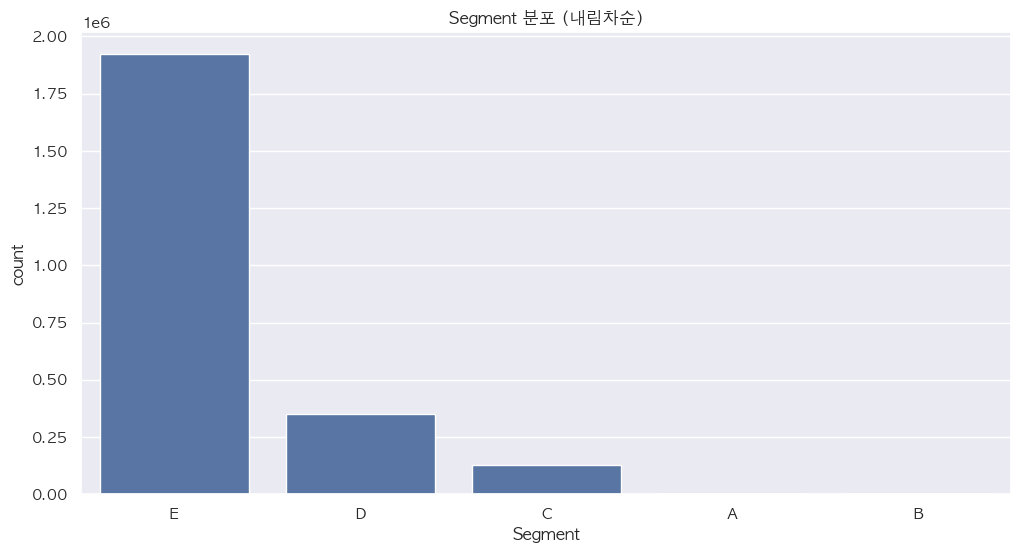

In [215]:
# 1. 내림차순 정렬된 Segment 순서 추출
order = df['Segment'].value_counts().sort_values(ascending=False).index

# 2. countplot에서 order=로 순서 지정
sns.countplot(data=df, x='Segment', order=order)
plt.title('Segment 분포 (내림차순)')
plt.show()

In [89]:
df['Segment'].value_counts(normalize=True)

Segment
E    0.800855
D    0.145517
C    0.053163
A    0.000405
B    0.000060
Name: proportion, dtype: float64

- Segment 수 E > D > C 
- E가 압도적으로 많음
- 클래스 간 불균형이 심함

## TM(=텔레 마케팅) 

In [225]:
#TM(=Tele Marketing), 전화, 팩스 등을 이용하여 상품이나 서비스를 홍보하거나 판매하는 마케팅 활동

In [127]:
#컬럼명에 'TM'이 들어가있는 것만 추출
tm_cols = [col for col in df.columns if '_TM_' in col]

In [186]:
df_tm = df[df['Segment'].isin(['C', 'D', 'E'])]  # segment A, B 제거함
segment_tm_mean = df_tm.groupby('Segment')[tm_cols].mean().T

# TM 채널 관련 변수들 중 상위 5개 변수만 보기
segment_tm_mean.sort_values(by='E', ascending=False).head(5)

Segment,C,D,E
컨택건수_카드론_TM_R6M,1.505040,1.748120,1.874827
컨택건수_보험_TM_R6M,0.435199,0.447870,0.516140
컨택건수_이용유도_TM_R6M,0.399545,0.581748,1.291629
컨택건수_카드론_TM_B0M,0.139925,0.168903,0.166960
컨택건수_부대서비스_TM_R6M,0.046383,0.054736,0.056545


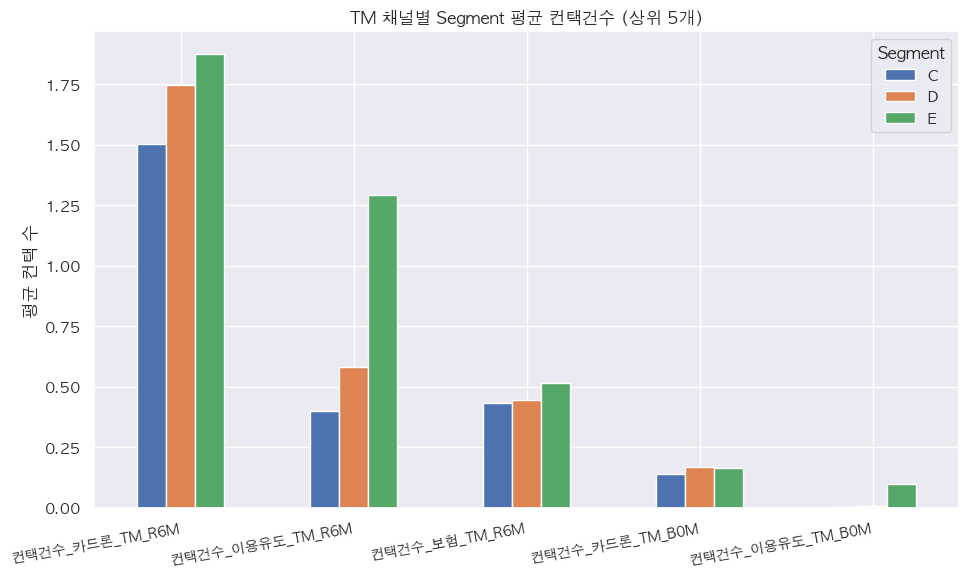

In [213]:
import matplotlib.pyplot as plt

# 상위 5개 변수
top_vars = segment_tm_mean.sort_values(by='E', ascending=False).head(5)

top_vars.plot(kind='bar', figsize=(10, 6))
plt.title('TM 채널별 Segment 평균 컨택건수 (상위 5개)')
plt.ylabel('평균 컨택 수')
plt.xticks(rotation=10, ha='right', fontsize=10) #x축을 조금 오른쪽으로 배치하고 싶은데 잘 모르겠다 
plt.tight_layout()
plt.show()


- Segment E는 카드론, 이용유도, 보험 채널에서 타 고객들보다 컨택 건수가 높음
- `컨택건수_이용유도_TM_R6M`은 E가 압도적으로 높음 

## LMS(=Long Message Service), 장문 문자 서비스 

In [230]:
#컬럼명에 'LMS'이 들어가있는 것만 추출
lms_cols = [col for col in df.columns if '_LMS_' in col]

In [232]:
df_lms = df[df['Segment'].isin(['C', 'D', 'E'])]  # segment A, B 제거함
segment_lms_mean = df_lms.groupby('Segment')[lms_cols].mean().T

# TM 채널 관련 변수들 중 상위 5개 변수만 보기
segment_lms_mean.sort_values(by='E', ascending=False).head(5)

Segment,C,D,E
컨택건수_이용유도_LMS_R6M,3.709507,3.662689,3.488987
컨택건수_이용유도_LMS_B0M,0.749259,0.728627,0.631678
컨택건수_CA_LMS_R6M,0.219962,0.277249,0.282035
컨택건수_카드론_LMS_R6M,0.062387,0.086882,0.094788
컨택건수_리볼빙_LMS_R6M,0.004240,0.005624,0.004276


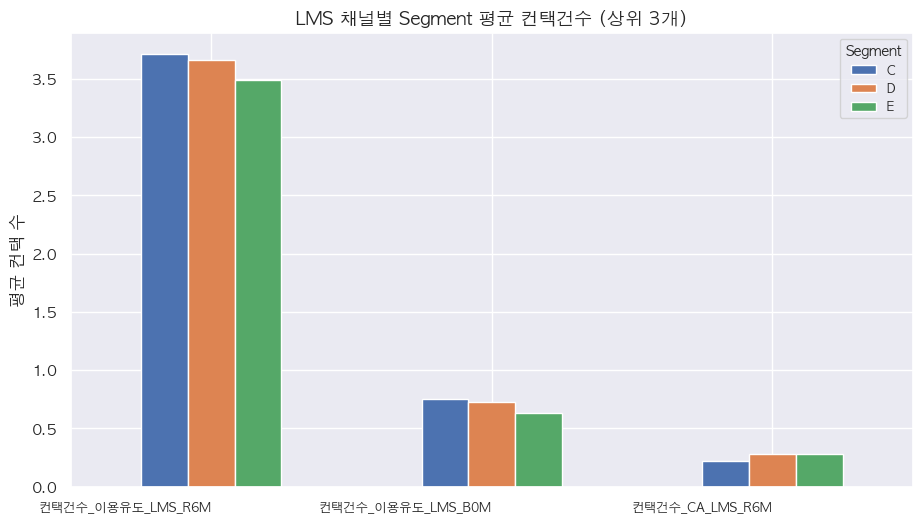

In [259]:
# 상위 3개 LMS 변수 (E 기준으로 내림차순 정렬)
top_lms_vars = segment_lms_mean.sort_values(by='E', ascending=False).head(3)
# 시각화
ax = top_lms_vars.plot(kind='bar', figsize=(10, 6))

# 제목, 축 라벨 등 설정
ax.set_title('LMS 채널별 Segment 평균 컨택건수 (상위 3개)', fontsize=13, loc='center')
ax.set_ylabel('평균 컨택 수')
# x축 텍스트 설정
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right', fontsize=9)

# 범례
plt.legend(title='Segment', fontsize=9, title_fontsize=10)
plt.grid(True)
plt.tight_layout(pad=2.5)
plt.show()


- `컨택건수_이용유도_R6M`, `컨택건수_이용유도_B0M` 모두 세그먼트 C가 가장 높음
- `컨택건수_이용유도` 기준 C > D > E

TM vs LMS 비교
- TM 채널에서는 Segment E의 평균 컨택건수가 가장 높아, 주 대상 고객군으로 집중된 경향이 뚜렷하다.
- 반면 LMS 채널에서는 Segment C의 평균 컨택건수가 가장 높지만, 세그먼트 간 격차가 크지는 않아 비교적 균형적으로 분포된 것으로 보인다.


In [268]:
df.columns

Index(['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M

In [270]:
#청구서, 인터넷, 당사앱, 캠페인접촉건수 분석 예정